<a href="https://colab.research.google.com/github/GiliardGodoi/bioinfo-sars-cov2-datasets/blob/main/EstudoCaso_1_ShannonEntropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="darkgrid")

import os
from os import path

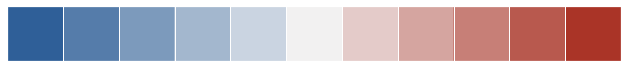

In [2]:
color_map = sns.diverging_palette(250, 15, s=80, l=40, n=11, center="light", as_cmap=True)
sns.palplot(sns.diverging_palette(250, 15, s=80, l=40, n=11, center="light",))

In [3]:
base = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2"
features = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed"
# results = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/results"

In [14]:
# Diretórios com as características extraídas.

folders = os.listdir(features)

print(folders,'\n')

folder = folders[0]

print(folder,'\n')

os.listdir(path.join(features, folder))

['1-covid', '2-other-viruses'] 

1-covid 



['chaos-game-theory_r4.csv',
 'complex-network-k3l10.csv',
 'fourier-class-r5.csv',
 'shannon-entropy-k12.csv']

In [15]:
df_entropy = pd.read_csv(path.join(features, folder, 'shannon-entropy-k12.csv'))
df_entropy.name = "Shannon's Entropy Features"
print('Entropia (Shannon)', df_entropy.shape)

Entropia (Shannon) (1717, 14)


In [16]:
df_entropy.head()

,nameseq,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,class
0,MN369046,1.947258,3.858477,5.760736,7.653392,9.525607,11.325758,12.884442,13.927217,14.440335,14.633892,14.696937,14.716328,0
1,MN306046,1.947011,3.858088,5.760560,7.653547,9.526318,11.327517,12.886543,13.930183,14.445938,14.641470,14.705093,14.724830,0
2,MF542265,1.946789,3.857781,5.759849,7.652205,9.524604,11.325808,12.885804,13.931567,14.447104,14.641521,14.705191,14.724444,0
3,KY983587,1.946912,3.857955,5.759917,7.651833,9.523715,11.323703,12.883437,13.930598,14.447270,14.641925,14.705766,14.724850,0
4,KY621348,1.947136,3.858235,5.760353,7.652140,9.523791,11.323748,12.882762,13.928372,14.444540,14.637878,14.701158,14.720012,0


In [17]:
df_entropy[['nameseq', 'class']].groupby('class').count()

,nameseq
class,
0,403
1,1314


In [18]:
col = [f'k{i}' for i in range(1,13)]
# col.append('class')

# df_entropy[col].groupby('class').describe()

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1.0))

print(col)

X = scaler.fit_transform(df_entropy[col[:12]])

df = pd.DataFrame(X, columns=col)

df['class'] = df_entropy['class']

df.head()

['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12']


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,class
0,0.711654,0.631596,0.591050,0.573452,0.607455,0.797275,0.867075,0.903825,0.934487,0.950845,0.953196,0.952922,0
1,0.709082,0.629484,0.590418,0.573858,0.608755,0.798569,0.867919,0.904714,0.936001,0.952827,0.955301,0.955105,0
2,0.706770,0.627816,0.587870,0.570343,0.605619,0.797311,0.867622,0.905129,0.936316,0.952840,0.955326,0.955006,0
3,0.708050,0.628766,0.588115,0.569367,0.603991,0.795763,0.866671,0.904839,0.936361,0.952946,0.955475,0.955110,0
4,0.710383,0.630285,0.589677,0.570172,0.604131,0.795796,0.866400,0.904171,0.935623,0.951887,0.954285,0.953868,0


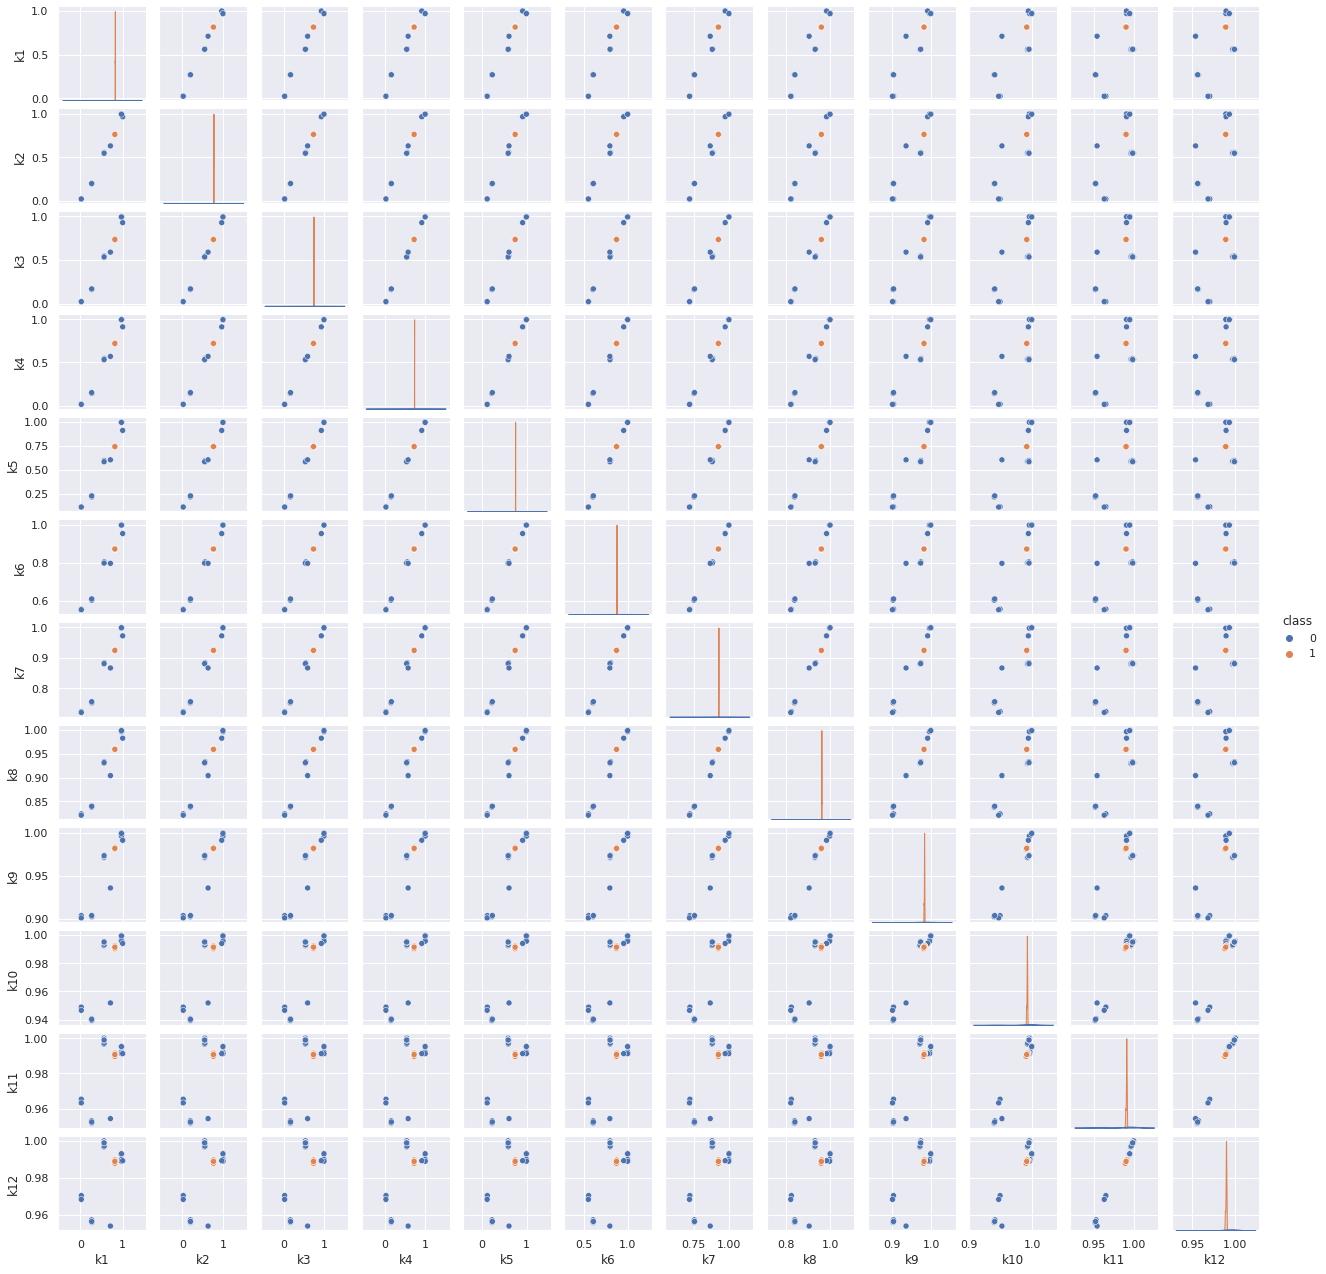

In [23]:
sns.pairplot(df.sample(150), hue="class", height=1.5)

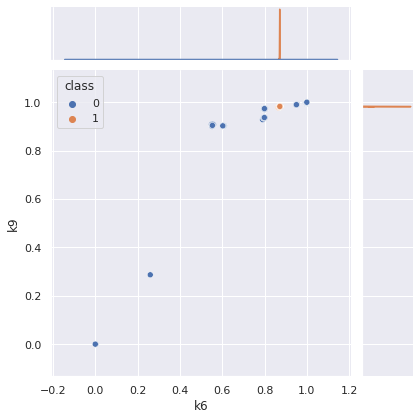

In [ ]:

g = sns.JointGrid(data=df, x="k6", y="k9", hue='class')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

In [ ]:
df[df['class'] == 1]['k6'].describe()

count    1314.000000
mean        0.871181
std         0.000789
min         0.864798
25%         0.870860
50%         0.871240
75%         0.871663
max         0.873361
Name: k6, dtype: float64

In [ ]:
df[df['class'] == 1]['k9'].describe()

count    1314.000000
mean        0.981817
std         0.000698
min         0.977817
25%         0.981589
50%         0.981915
75%         0.982302
max         0.983648
Name: k9, dtype: float64

In [ ]:
df[df['class'] == 1]['k4'].describe()

count    1314.000000
mean        0.718650
std         0.001655
min         0.705448
25%         0.717694
50%         0.718960
75%         0.719711
max         0.723830
Name: k4, dtype: float64

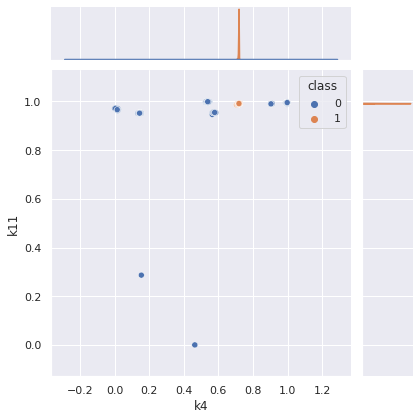

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.JointGrid(data=df, x="k4", y="k11", hue='class')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)


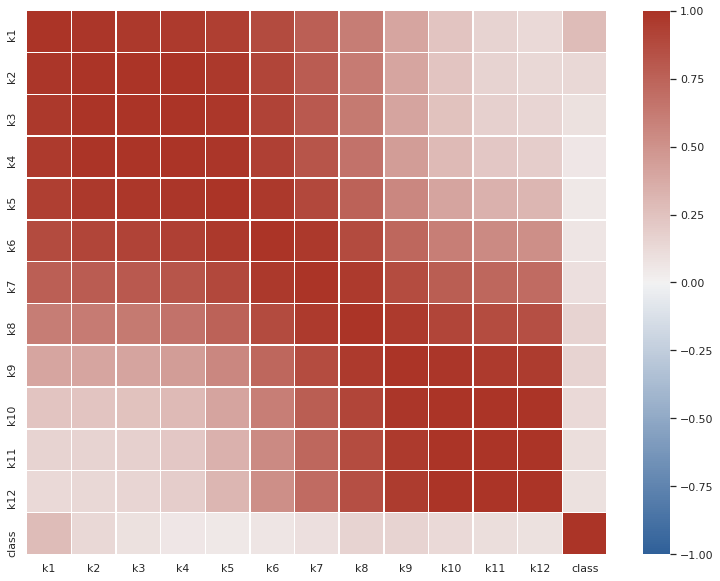

In [22]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap=color_map)